<a href="https://colab.research.google.com/github/NatchaponJ/Netflix_Cost/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()

Saving netflix price in different countries.csv to netflix price in different countries.csv


In [4]:
df = pd.read_csv('netflix price in different countries.csv')

In [5]:
df

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Country - 0%
Total Library Size - 0%
No. of TV Shows - 0%
No. of Movies - 0%
Cost Per Month - Basic ($) - 0%
Cost Per Month - Standard ($) - 0%
Cost Per Month - Premium ($) - 0%


In [7]:
df.dtypes

Country                           object
Total Library Size                 int64
No. of TV Shows                    int64
No. of Movies                      int64
Cost Per Month - Basic ($)       float64
Cost Per Month - Standard ($)    float64
Cost Per Month - Premium ($)     float64
dtype: object

In [8]:
df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [18]:
cost_df = df.rename(columns={'Cost Per Month - Basic ($)':'Basic_USD/Month', 
                            'Cost Per Month - Standard ($)':'Standard_USD/Month',
                            'Cost Per Month - Premium ($)':'Premium_USD/Month',
                             'No. of TV Shows':'TV Shows',
                             'No. of Movies':'Movies'})

In [19]:
cost_df

,Country,Total Library Size,TV Shows,Movies,Basic_USD/Month,Standard_USD/Month,Premium_USD/Month
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74
...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32
61,Switzerland,5506,3654,1852,12.88,20.46,26.96
62,Australia,6114,4050,2064,7.84,12.12,16.39
63,Denmark,4558,2978,1580,12.00,15.04,19.60


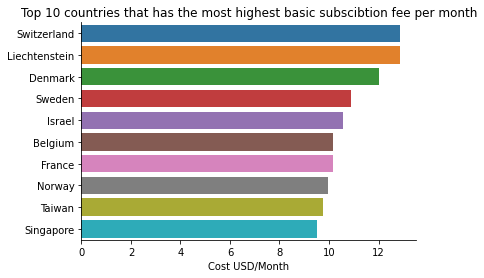

In [28]:
Basic_sorted = cost_df.sort_values(by='Basic_USD/Month', ascending=False)
sns.barplot(y='Country', x='Basic_USD/Month', data=Basic_sorted.iloc[:10])
sns.despine()
plt.xlim()
plt.xlabel('Cost USD/Month')
plt.ylabel('')
plt.title('Top 10 countries that has the most highest basic subscibtion fee per month')
plt.show()

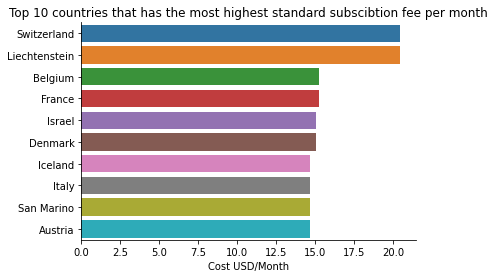

In [29]:
Standard_sorted = cost_df.sort_values(by='Standard_USD/Month', ascending=False)
sns.barplot(y='Country', x='Standard_USD/Month', data=Standard_sorted.iloc[:10])
sns.despine()
plt.xlim()
plt.xlabel('Cost USD/Month')
plt.ylabel('')
plt.title('Top 10 countries that has the most highest standard subscibtion fee per month')
plt.show()

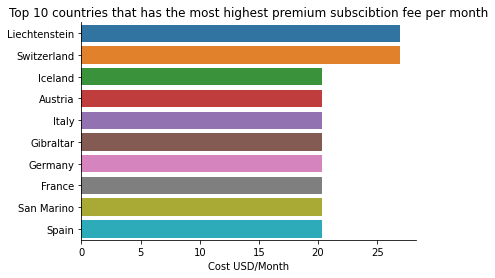

In [30]:
Premium_sorted = cost_df.sort_values(by='Premium_USD/Month', ascending=False)
sns.barplot(y='Country', x='Premium_USD/Month', data=Premium_sorted.iloc[:10])
sns.despine()
plt.xlim()
plt.xlabel('Cost USD/Month')
plt.ylabel('')
plt.title('Top 10 countries that has the most highest premium subscibtion fee per month')
plt.show()

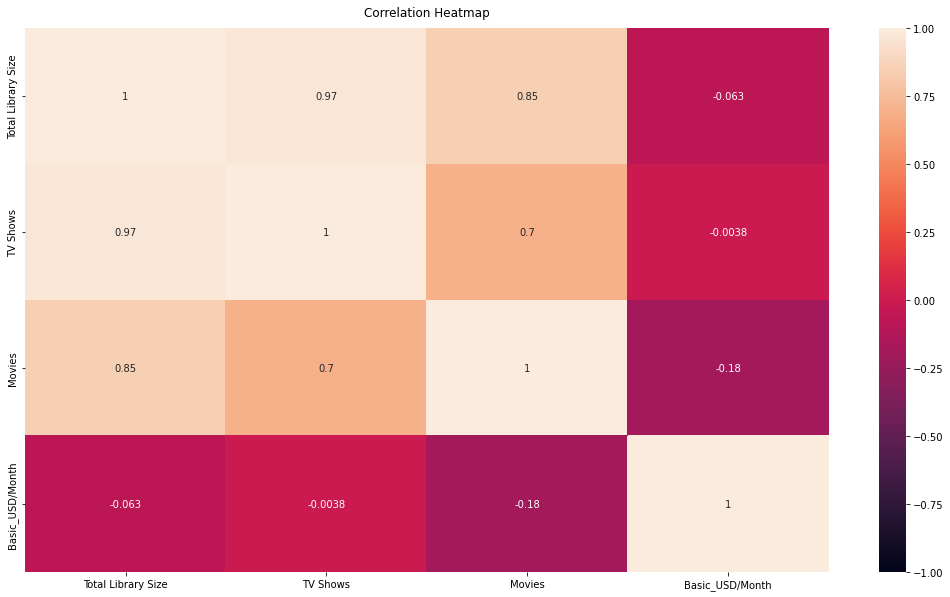

In [50]:
basicdf = Basic_sorted.iloc[:,:5]
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(basicdf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

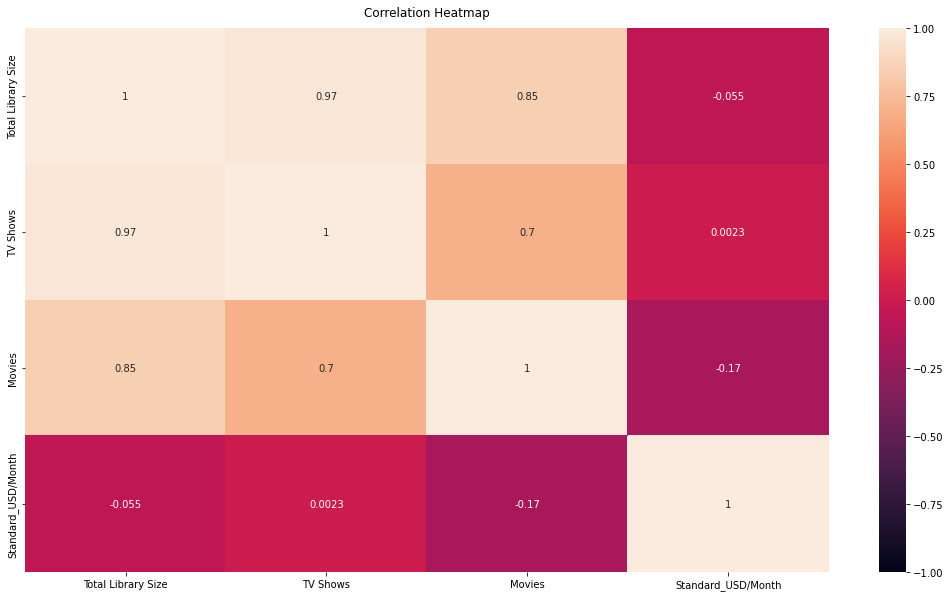

In [55]:
standdf = Standard_sorted.drop(columns='Basic_USD/Month').iloc[:,:5]
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(standdf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

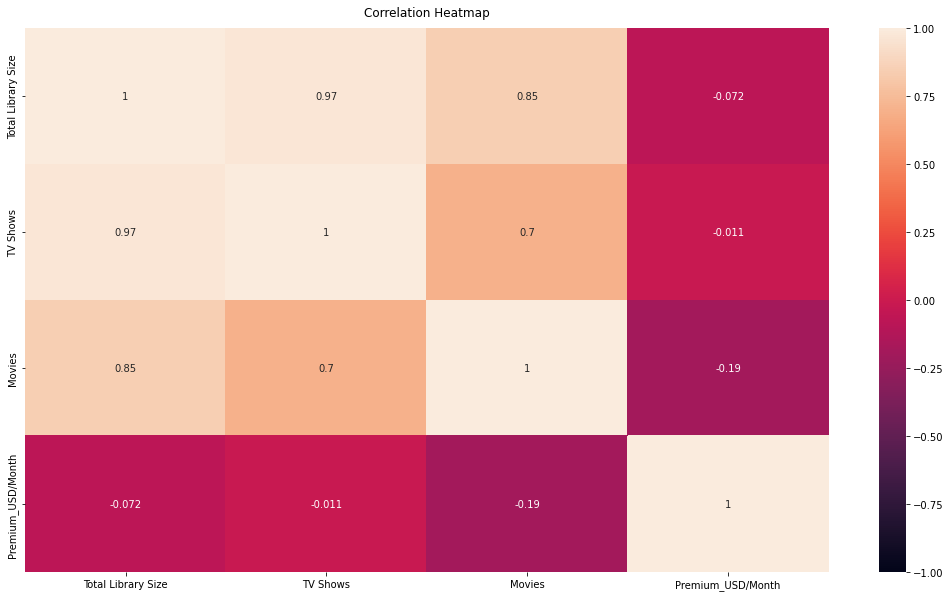

In [60]:
premdf = Premium_sorted.drop(columns=['Basic_USD/Month','Standard_USD/Month']).iloc[:,:5]
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(premdf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [66]:
cost_df['Basic_USD/Month'].median()

8.99

In [67]:
cost_df['Standard_USD/Month'].median()

11.49

In [68]:
cost_df['Premium_USD/Month'].median()

14.45